In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import jieba
import wordcloud

In [2]:
font_path = "/Users/nick/Desktop/project/0data/a/SimHei.ttf"
p1_path = "/Users/nick/Desktop/project/0data/a/1112 3D-printed-car-for-imts .xlsx"
p2_path = "/Users/nick/Desktop/project/0data/a/1112 LM-SF01(1).xlsx"
p3_path = "/Users/nick/Desktop/project/0data/a/1112 RF.xlsx"

In [3]:
df1 = pd.read_excel(p1_path)
df2 = pd.read_excel(p2_path)
df3 = pd.read_excel(p3_path)

In [4]:
df1.head()

,user,reuser,date,action,activity,content
0,AlexFi,NaN,2014-01-14T17:11:00+00:00,created a topic,Large Scale Gantry FDM/Router,Large Scale Gantry FDM/Router\n\n ...
1,Jearle,NaN,2014-01-17T16:17:33+00:00,created a topic,Fasteners,Fasteners\n\n \n ...
2,Jearle,NaN,2014-01-17T16:24:22+00:00,created a topic,FDM Materials,FDM Materials\n\n \n ...
3,Jearle,NaN,2014-01-17T16:30:21+00:00,created a topic,Frame Geometry and Infill Patterns,Frame Geometry and Infill Patterns\n\n ...
4,Jearle,NaN,2014-01-17T16:36:37+00:00,commented on the topic,Frame Geometry and Infill Patterns,One of the things we first talked about was po...


In [5]:
df2.head()

,name,time,action,activity,content
0,idesigncars,2014-10-20T21:46:27.759440+00:00,commented on the topic,...And the Winners are...!,@karen_dustry.... Sigh.....
1,nfreytag,2014-10-20T20:28:18+00:00,added a blogpost,0000,The Local Motors Sports Car Platform has been ...
2,rambone,2014-11-06T02:05:33.780373+00:00,added a personal-project,0000,common ducati already
3,rambone,2014-11-06T20:48:28.216903+00:00,updated design,0000,ideas on the MODSTER modular sports car
4,Huynh_ngoc_lan600,2014-11-07T11:36:06.644449+00:00,updated design,0000,S-400 concept


In [6]:
df3.head()

,Fuser,date,action,uri,content,InReplyTo,Topic编号
0,benzo_ferrari,2008-05-20T20:23:08Z,commented on the topic,https://cocreate.localmotors.com/discussion/to...,This checkup was approved on Tuesday May 20th ...,NaN,42092/
1,localmotors,2008-05-20T20:24:26Z,commented on the topic,https://cocreate.localmotors.com/discussion/to...,This checkup was approved on Tuesday May 20th ...,NaN,42092/
2,deuxfov,2008-05-20T20:24:26Z,commented on the topic,https://cocreate.localmotors.com/discussion/to...,x1 mid-engine suv concept,NaN,42092/
3,deuxfov,2008-05-20T20:24:26Z,created a topic,x1 mid-engine concept,x1 mid-engine concept,NaN,42092/
4,filski,2008-05-20T20:56:30Z,commented on the topic,https://cocreate.localmotors.com/discussion/to...,did BMW know about you before they designed th...,NaN,42092/


# 1. 统计每个项目下的用户人数

In [7]:
p1 = df1['user'].value_counts().shape[0]
p2 = df2['name'].value_counts().shape[0]
p3 = df3['Fuser'].value_counts().shape[0]
pd.DataFrame([[p1,p2,p3]], columns=["3D-printed", "LM-SF", "RF"])

,3D-printed,LM-SF,RF
0,336,703,332


# 2. 以一个月为单位时长,统计每月参与项目人数，并画出折线图

In [8]:
df1["date"] = pd.to_datetime(df1["date"])
df1 = df1.set_index("date")

df2["time"] = pd.to_datetime(df2["time"])
df2 = df2.set_index("time")

df3["date"] = pd.to_datetime(df3["date"])
df3 = df3.set_index("date")

In [9]:
df1_month = df1.to_period('M')
df1_month_user = df1_month.groupby(df1_month.index)["user"].count()

df2_month = df2.to_period('M')
df2_month_user = df2_month.groupby(df2_month.index)["name"].count()

df3_month = df3.to_period('M')
df3_month_user = df3_month.groupby(df3_month.index)["Fuser"].count()

/Users/nick/.venv/ML-training/lib/python3.6/site-packages/pandas/core/arrays/datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


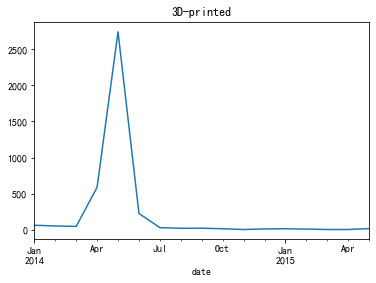

In [10]:
df1_month_user.plot(title='3D-printed')

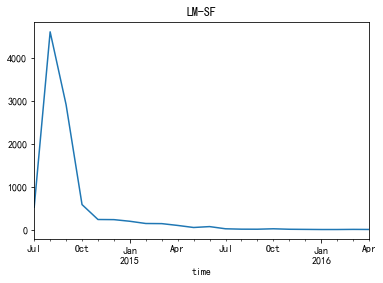

In [11]:
df2_month_user.plot(title='LM-SF')

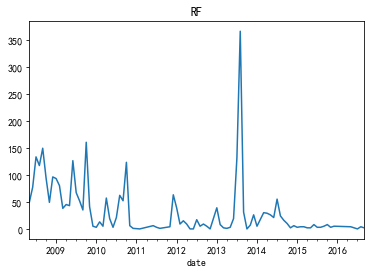

In [12]:
df3_month_user.plot(title='RF')

# 3. 统计action的类别，每个类别action数量（饼图），随时间分布折线图，每个用户action随时间的分布

In [13]:
df1_action = pd.DataFrame(df1['action'].value_counts().rename("3D-printed action count", inplace = True))
# action的类别
df1_action

,3D-printed action count
commented on the entry,2919
commented on the topic,545
added a entry to,206
commented on the blogpost,109
created a topic,47
commented on the idea,17
added a idea to,12
added a blogpost to,2
added a file to,2


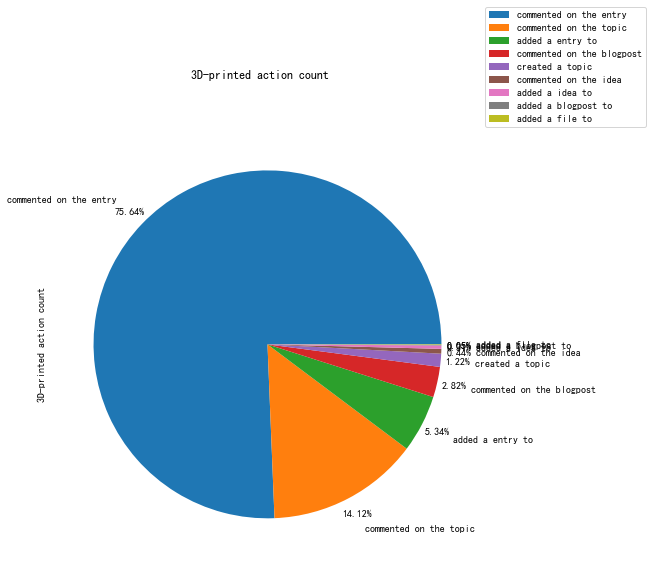

In [14]:
# action数量的饼图
df1_action.plot.pie(figsize=(8, 8), subplots=True, autopct="%.2f%%",
                    legend=True, title="3D-printed action count", labeldistance=1.2,pctdistance=1.1)
plt.legend(loc=[1, 1])

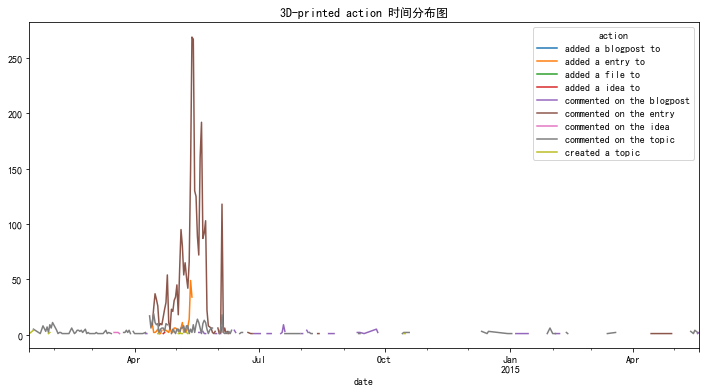

In [15]:
# action随时间分布图
df1_day = df1.to_period('D')
df1_day
df1_day_user = df1_day.groupby([df1_day.index])["action"].value_counts()
df1_day_user.unstack(level = 1).plot(figsize=(12, 6), title="3D-printed action 时间分布图")

In [16]:
# 用户下的action随机时间分布
df1_day.groupby([df1_day.index, "action"])["user"].value_counts()

date        action                     user                 
2014-01-14  created a topic            AlexFi                   1
2014-01-17  commented on the topic     Aurel.                   3
                                       Jearle                   2
            created a topic            Jearle                   3
                                       Aurel.                   1
2014-01-22  commented on the topic     Jearle                   1
2014-01-24  commented on the topic     burhop                   3
                                       jrogers                  3
                                       AlexFi                   1
                                       nllanos                  1
            created a topic            jrogers                  1
2014-01-26  commented on the topic     MattJackson              2
                                       RaMansell                1
2014-01-27  commented on the topic     Jearle                   5
               

In [17]:
df2_action = pd.DataFrame(df2['action'].value_counts().rename("LM-SF action count", inplace = True))
# action的类别
df2_action

,LM-SF action count
commented on the entry,5859
commented on the topic,1640
updated entry in,1077
added a idea to,349
commented on the idea,300
commented on the blogpost,253
added a entry to,202
added a file to,76
created a topic,36
updated idea in,18


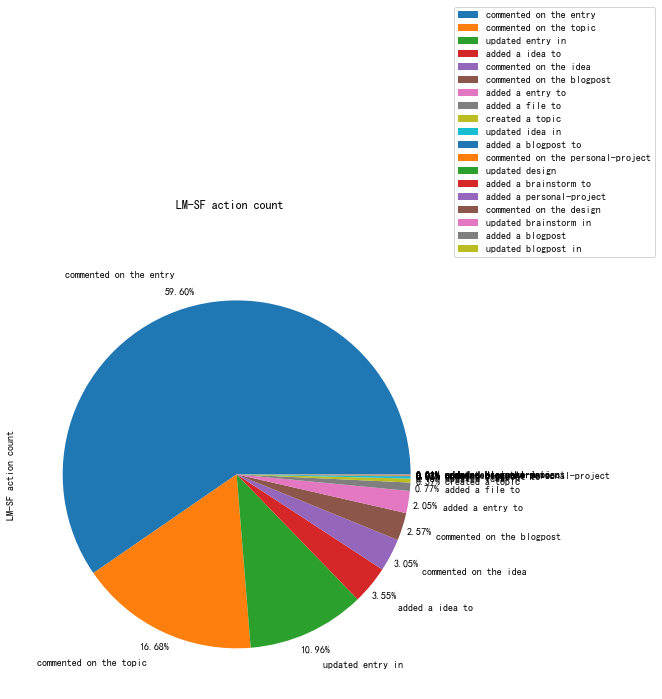

In [18]:
# action数量的饼图
df2_action.plot.pie(figsize=(8, 8), subplots=True, autopct="%.2f%%",
                    legend=True, title="LM-SF action count", labeldistance=1.2,pctdistance=1.1)
plt.legend(loc=[1, 1])

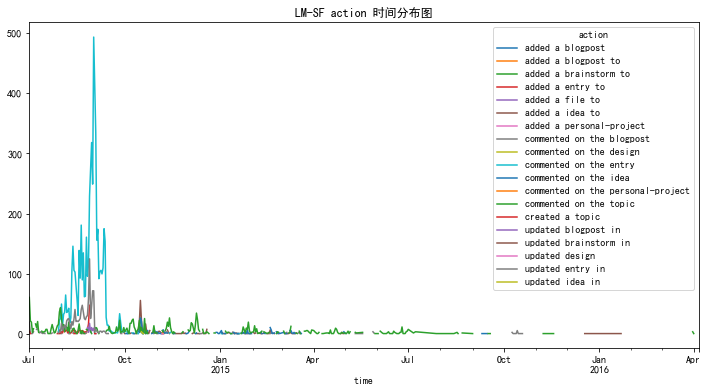

In [19]:
# action随时间分布图
df2_day = df2.to_period('D')
df2_day_user = df2_day.groupby([df2_day.index])["action"].value_counts()
df2_day_user.unstack(level = 1).plot(figsize=(12, 6), title="LM-SF action 时间分布图")

In [20]:
# 用户下的action随机时间分布
df2_day.groupby([df2_day.index, "action"])["name"].value_counts()

time        action                     name              
2014-07-01  commented on the blogpost  MattJackson            6
                                       dirk                   2
                                       zz383mero              2
                                       Flyball                1
                                       MicheleAbbate          1
                                       RaMansell              1
                                       Tony_Rivera            1
                                       gferguson              1
                                       ivan.pankratov         1
                                       jmullens               1
                                       jonathon.klein         1
                                       jorge.mma.moreira      1
                                       nathaniel.s.green      1
            commented on the topic     MattJackson           14
                                       flamesk

In [21]:
df3_action = pd.DataFrame(df3['action'].value_counts().rename("RF action count", inplace = True))
# action的类别
df3_action

,RF action count
commented on the topic,2237
commented on the entry,265
created a topic,258
commented on the idea,126
added a blogpost,66
commented on the topic,58
added a idea to,37
added a entry to,34
added a design,15
commented on the design,7


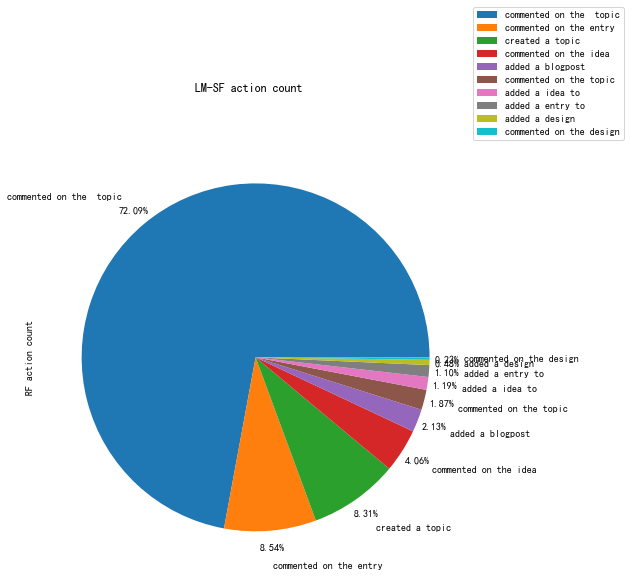

In [22]:
# action数量的饼图
df3_action.plot.pie(figsize=(8, 8), subplots=True, autopct="%.2f%%",
                    legend=True, title="LM-SF action count", labeldistance=1.2,pctdistance=1.1)
plt.legend(loc=[1, 1])

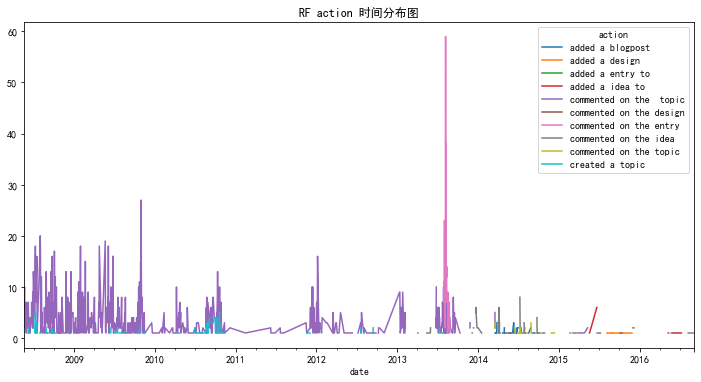

In [23]:
# action随时间分布图
df3_day = df3.to_period('D')
df3_day_user = df3_day.groupby([df3_day.index])["action"].value_counts()
df3_day_user.unstack(level = 1).plot(figsize=(12, 6), title="RF action 时间分布图")

In [24]:
# 用户下的action随机时间分布
df3_day.groupby([df3_day.index, "action"])["Fuser"].value_counts()

date        action                   Fuser               
2008-05-20  commented on the  topic  jrogers                 3
                                     benzo_ferrari           2
                                     deuxfov                 1
                                     filski                  1
                                     localmotors             1
                                     tthomas                 1
            created a topic          deuxfov                 1
2008-05-21  commented on the  topic  benzo_ferrari           4
                                     jrogers                 2
                                     Canay                   1
                                     Palethorpe              1
                                     deuxfov                 1
                                     rizawerks               1
2008-05-22  commented on the  topic  Ben-J                   1
                                     Palethorpe             

# 4. activity主题的数量，随时间分布（折线图）

In [25]:
# activity的数量
p1 = df1['activity'].value_counts().shape[0]
p2 = df2['activity'].value_counts().shape[0]
pd.DataFrame([[p1,p2]], columns=["3D-printed", "LM-SF"])

,3D-printed,LM-SF
0,300,485


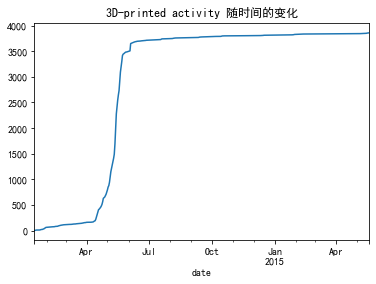

In [26]:
# 主题数随时间变化（累积）
df1_day = df1.to_period('D')
df1_day_user = df1_day.groupby(df1_day.index)["activity"].count()
df1_day_user.cumsum().plot(title='3D-printed activity 随时间的变化')

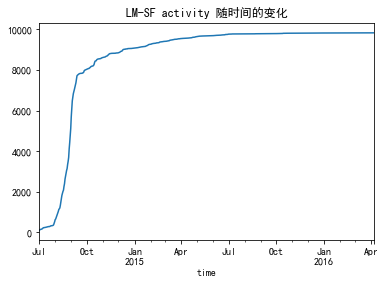

In [27]:
# 主题数随时间变化（累积）
df2_day = df2.to_period('D')
df2_day_user = df2_day.groupby(df2_day.index)["activity"].count()
df2_day_user.cumsum().plot(title='LM-SF activity 随时间的变化')

# 5. 以activity为索引，建立用户关系图（网络图）

In [28]:
# 先统计所有的action
a = set(df1['action'].value_counts().index)
b = set(df2['action'].value_counts().index)
c = set(df3['action'].value_counts().index)
all_action = list(a | b | c)
all_action

['commented on the design',
 'commented on the  topic',
 'added a file to',
 'commented on the entry',
 'created a topic',
 'added a design',
 'updated idea in',
 'updated brainstorm in',
 'commented on the blogpost',
 'updated blogpost in',
 'added a idea to',
 'commented on the personal-project',
 'added a entry to',
 'commented on the idea',
 'added a brainstorm to',
 'updated design',
 'commented on the topic',
 'added a blogpost to',
 'added a personal-project',
 'updated entry in',
 'added a blogpost']

In [29]:
# 创建帖子
build_action = []
for i in all_action:
    if i.startswith("created"):
        build_action.append(i)
build_action

['created a topic']

In [30]:
# 评论动作帖子
not_build_action = []
for i in all_action:
    if not i.startswith("created"):
        not_build_action.append(i)
not_build_action

['commented on the design',
 'commented on the  topic',
 'added a file to',
 'commented on the entry',
 'added a design',
 'updated idea in',
 'updated brainstorm in',
 'commented on the blogpost',
 'updated blogpost in',
 'added a idea to',
 'commented on the personal-project',
 'added a entry to',
 'commented on the idea',
 'added a brainstorm to',
 'updated design',
 'commented on the topic',
 'added a blogpost to',
 'added a personal-project',
 'updated entry in',
 'added a blogpost']

In [31]:
df1_activity = pd.read_excel(p1_path)
df1_activity = df1_activity.set_index("activity")
df2_activity = pd.read_excel(p2_path)
df2_activity = df2_activity.set_index("activity")

In [32]:
# 项目一 3Dprinter
df1_activity_create = df1_activity[df1_activity['action'].isin(build_action)][["user"]]
df1_activity_create_map = dict()
for index, value in enumerate(df1_activity_create.user):
    df1_activity_create_map[df1_activity_create.index[index]] = value
    
def map_dict(v):
    try:
        return df1_activity_create_map[v]
    except:
        return np.NaN

df1_activity["action_to"] = df1_activity.index
df1_activity["action_to"] = df1_activity["action_to"].apply(map_dict)

df1_activity["is_add"] = df1_activity["action"].apply(lambda x:1 if x in build_action else 0)

df1_activity.head()

,user,reuser,date,action,content,action_to,is_add
activity,,,,,,,
Large Scale Gantry FDM/Router,AlexFi,NaN,2014-01-14T17:11:00+00:00,created a topic,Large Scale Gantry FDM/Router\n\n ...,AlexFi,1
Fasteners,Jearle,NaN,2014-01-17T16:17:33+00:00,created a topic,Fasteners\n\n \n ...,Jearle,1
FDM Materials,Jearle,NaN,2014-01-17T16:24:22+00:00,created a topic,FDM Materials\n\n \n ...,Jearle,1
Frame Geometry and Infill Patterns,Jearle,NaN,2014-01-17T16:30:21+00:00,created a topic,Frame Geometry and Infill Patterns\n\n ...,Jearle,1
Frame Geometry and Infill Patterns,Jearle,NaN,2014-01-17T16:36:37+00:00,commented on the topic,One of the things we first talked about was po...,Jearle,0


In [33]:
print(df1_activity.shape)
df1_activity_na = df1_activity.dropna()
print(df1_activity_na.shape)
df1_activity_na[["user", "action_to"]].head(10)

(3859, 7)
(104, 7)


,user,action_to
activity,,
General Challenge Discussion,vasilatos_ianis,idesigncars
General Challenge Discussion,idesigncars,idesigncars
General Challenge Discussion,idesigncars,idesigncars
General Challenge Discussion,idesigncars,idesigncars
General Challenge Discussion,idesigncars,idesigncars
General Challenge Discussion,idesigncars,idesigncars
General Challenge Discussion,Dodo_101,idesigncars
General Challenge Discussion,burhop,idesigncars
General Challenge Discussion,Dodo_101,idesigncars


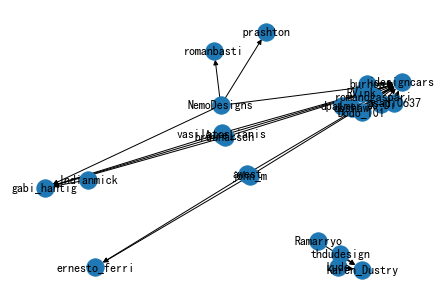

In [34]:
G = nx.DiGraph()
G.add_edges_from(df1_activity_na[["user", "action_to"]].values)
nx.draw(G, with_labels=True)
plt.show()

In [35]:
# 项目二 LS
df2_activity_create = df2_activity[df2_activity['action'].isin(build_action)][["name"]]
df2_activity_create_map = dict()
for index, value in enumerate(df2_activity_create.name):
    df2_activity_create_map[df2_activity_create.index[index]] = value
    
def map_dict(v):
    try:
        return df2_activity_create_map[v]
    except:
        return np.NaN

df2_activity["action_to"] = df2_activity.index
df2_activity["action_to"] = df2_activity["action_to"].apply(map_dict)

df2_activity["is_add"] = df2_activity["action"].apply(lambda x:1 if x in build_action else 0)

df2_activity.head()

,name,time,action,content,action_to,is_add
activity,,,,,,
...And the Winners are...!,idesigncars,2014-10-20T21:46:27.759440+00:00,commented on the topic,@karen_dustry.... Sigh.....,NaN,0
0000,nfreytag,2014-10-20T20:28:18+00:00,added a blogpost,The Local Motors Sports Car Platform has been ...,NaN,0
0000,rambone,2014-11-06T02:05:33.780373+00:00,added a personal-project,common ducati already,NaN,0
0000,rambone,2014-11-06T20:48:28.216903+00:00,updated design,ideas on the MODSTER modular sports car,NaN,0
0000,Huynh_ngoc_lan600,2014-11-07T11:36:06.644449+00:00,updated design,S-400 concept,NaN,0


In [36]:
print(df2_activity.shape)
df2_activity_na = df2_activity.dropna()
print(df2_activity_na.shape)
df2_activity_na[["name", "action_to"]].head(10)

(9830, 6)
(1471, 6)


,name,action_to
activity,,
8.8s no weight and a terrifyingly fun right pedal,aronethridge,aronethridge
Aero Discussion,MicheleAbbate,MicheleAbbate
Aero Discussion,MicheleAbbate,MicheleAbbate
Aero Discussion,idesigncars,MicheleAbbate
Aero Discussion,MicheleAbbate,MicheleAbbate
Aero Discussion,MattJackson,MicheleAbbate
Aero Discussion,idesigncars,MicheleAbbate
Aero Discussion,MicheleAbbate,MicheleAbbate
Aero Discussion,MattJackson,MicheleAbbate


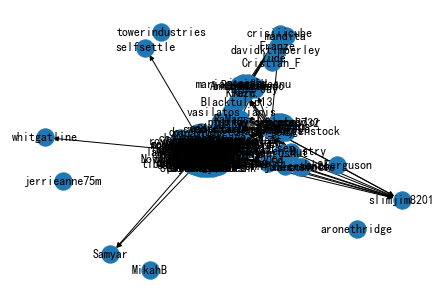

In [37]:
G = nx.DiGraph()
G.add_edges_from(df2_activity_na[["name", "action_to"]].values)
nx.draw(G, with_labels=True)
plt.show()

# 6. 统计每个项目下用户的出度（评论别人，发帖），入度（被评论）

In [38]:
# 对这张表来说，user是出度，action_to是入度
df1_activity_user = df1_activity[["user", "action_to"]]
df1_activity_user.head()

,user,action_to
activity,,
Large Scale Gantry FDM/Router,AlexFi,AlexFi
Fasteners,Jearle,Jearle
FDM Materials,Jearle,Jearle
Frame Geometry and Infill Patterns,Jearle,Jearle
Frame Geometry and Infill Patterns,Jearle,Jearle


In [39]:
# 3Dprinter的出度数量
df1_activity_user_to = pd.DataFrame(df1_activity_user.groupby("user")["user"].count())
# 3Dprinter的入度数量
df1_activity_user_in = pd.DataFrame(df1_activity_user.groupby("action_to")["action_to"].count())
df1_action = df1_activity_user_to.join(df1_activity_user_in).fillna(0)
df1_action.columns = ["出度", "入度"]
df1_action.head(8)

,出度,入度
user,,
j.chambon,1,0.0
0,1,0.0
3DPrintWise,1,0.0
7cantlose,1,0.0
AMR,12,0.0
Adan,8,0.0
AirGar,1,0.0
AlexFi,4,5.0


In [40]:
# 对这张表来说，user是出度，action_to是入度
df2_activity_user = df2_activity[["name", "action_to"]]
df2_activity_user.head()

,name,action_to
activity,,
...And the Winners are...!,idesigncars,NaN
0000,nfreytag,NaN
0000,rambone,NaN
0000,rambone,NaN
0000,Huynh_ngoc_lan600,NaN


In [41]:
# LS的出度数量
df2_activity_user_to = pd.DataFrame(df2_activity_user.groupby("name")["name"].count())
# LS的入度数量
df2_activity_user_in = pd.DataFrame(df2_activity_user.groupby("action_to")["action_to"].count())
df2_action = df2_activity_user_to.join(df2_activity_user_in).fillna(0)
df2_action.columns = ["出度", "入度"]
df2_action.head(8)

,出度,入度
name,,
A.James,15,0.0
AC3R1GG1NS,3,0.0
APP,1,0.0
AdamKeiser,2,0.0
Adan,57,0.0
Afongartdesign,19,0.0
AlexFi,2,0.0
Alireza,3,0.0


# 8. 统计每个主题下用户的出度与入度（同时统计按时间分布）

In [42]:
df1_activity.head()

,user,reuser,date,action,content,action_to,is_add
activity,,,,,,,
Large Scale Gantry FDM/Router,AlexFi,NaN,2014-01-14T17:11:00+00:00,created a topic,Large Scale Gantry FDM/Router\n\n ...,AlexFi,1
Fasteners,Jearle,NaN,2014-01-17T16:17:33+00:00,created a topic,Fasteners\n\n \n ...,Jearle,1
FDM Materials,Jearle,NaN,2014-01-17T16:24:22+00:00,created a topic,FDM Materials\n\n \n ...,Jearle,1
Frame Geometry and Infill Patterns,Jearle,NaN,2014-01-17T16:30:21+00:00,created a topic,Frame Geometry and Infill Patterns\n\n ...,Jearle,1
Frame Geometry and Infill Patterns,Jearle,NaN,2014-01-17T16:36:37+00:00,commented on the topic,One of the things we first talked about was po...,Jearle,0


In [43]:
# 3Dprinter 按照主题的出度数量
df1_activity.groupby([df1_activity.index])["user"].value_counts()

activity                            user               
"E130"                              JannS                   4
                                    NemoDesigns             2
                                    braunarsch              1
                                    chavito                 1
                                    nick_ricci              1
"Nemi Bone" 3D Printed Car          BMWZ8                   9
                                    NemoDesigns             3
                                    GTR                     2
                                    Alireza                 1
                                    Aurel.                  1
                                    M.Monfared              1
                                    Mr-Design               1
                                    Qo-Di                   1
                                    braunarsch              1
                                    cutesamuel004           1
              

In [44]:
# 3Dprinter 按照主题的入度数量
df1_activity.groupby([df1_activity.index])["action_to"].value_counts()

activity                                      action_to       
3D printer working area                       romanogaspari         3
3D printing a house                           Helpp                 1
3DPCX                                         gabi_hantig         176
Advanced Materials                            burhop                7
Car Assembly Updates                          awest                 5
Design for Customization                      awest                 3
Dunkleostra                                   braunarsch           14
Edit your entry?                              Botzen                2
Electric powertrain                           nllanos              26
Excited about Hondas new engine?              patron_vectras        3
FDM Materials                                 Jearle               29
FIRST robotics chassis                        jrogers               7
Fasteners                                     Jearle               20
Frame Geometry and Infill P

In [45]:
# LS 按照主题的出度数量
df2_activity.groupby([df2_activity.index])["name"].value_counts()

activity                                    name             
...And the Winners are...!                  idesigncars           1
0000                                        rambone               2
                                            Huynh_ngoc_lan600     1
                                            nfreytag              1
1st doodle                                  Aurel.                1
                                            Franze                1
                                            NemoDesigns           1
                                            designman4            1
                                            idesigncars           1
                                            papagomp              1
2-BoXXer                                    Bearon                1
                                            NemoDesigns           1
20140820 LC SCPC Matteo Gentile Proposals.  mark2257              2
                                            Miletic_De

In [46]:
# LS 按照主题的入度数量
df2_activity.groupby([df2_activity.index])["action_to"].value_counts()

activity                                           action_to       
8.8s no weight and a terrifyingly fun right pedal  aronethridge          1
Aero Discussion                                    MicheleAbbate         8
Are some designs looking very similar?             papagomp              3
AutoCAD drawings                                   PKDow                 3
Body Refinement Stage 1                            NemoDesigns         226
Body Refinement Stage 2                            NemoDesigns          67
Body production                                    NemoDesigns          30
Body/Aerodynamics                                  Rhein                26
Brakes, Clutch, Hydraulics                         bse50                 7
Chassis                                            MattJackson         148
Chassis Design Discussion                          MattJackson          34
Computational Fluid Dynamics                       slimjim8201          67
Extending the challange for a we

# 9. content分词

In [47]:
stoplist = [" ", "\n", "\xa0"]
def cut_word(txt):
    return [w for w in jieba.cut(txt) if w not in stoplist]

In [48]:
# 3Dprinter
df1 = df1.dropna()
df1["cut"] = df1["content"].apply(cut_word)
df1.head()

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/wq/03z5h7352159jp2k5p83ts500000gn/T/jieba.cache
Loading model cost 0.767 seconds.
Prefix dict has been built successfully.


,user,reuser,action,activity,content,cut
date,,,,,,
2014-04-12 05:05:41+00:00,vasilatos_ianis,iuli,commented on the topic,General Challenge Discussion,and you did! \n\n View topi...,"[and, you, did, !, View, topic, Reply]"
2014-04-12 15:56:25+00:00,idesigncars,spoon334,commented on the topic,General Challenge Discussion,"This is noted. C'mon Spoon, you only have 12 h...","[This, is, noted, ., C, ', mon, Spoon, ,, you,..."
2014-04-12 15:56:36+00:00,idesigncars,Dodo_101,commented on the topic,General Challenge Discussion,Nope-- see reply to Spoon\n\n ...,"[Nope, --, see, reply, to, Spoon, View, topic,..."
2014-04-12 15:56:50+00:00,idesigncars,iuli,commented on the topic,General Challenge Discussion,Thats probably it. \n\n Vie...,"[Thats, probably, it, ., View, topic, Reply]"
2014-04-12 15:57:39+00:00,idesigncars,Paulo,commented on the topic,General Challenge Discussion,"Paulo, great question. Right now the pinter is...","[Paulo, ,, great, question, ., Right, now, the..."


In [49]:
# LS
df2 = df2.dropna()
df2["cut"] = df2["content"].apply(cut_word)
df2.head()

,name,action,activity,content,cut
time,,,,,
2014-10-20 21:46:27.759440+00:00,idesigncars,commented on the topic,...And the Winners are...!,@karen_dustry.... Sigh.....,"[@, karen, _, dustry, ...., Sigh, .....]"
2014-10-20 20:28:18+00:00,nfreytag,added a blogpost,0000,The Local Motors Sports Car Platform has been ...,"[The, Local, Motors, Sports, Car, Platform, ha..."
2014-11-06 02:05:33.780373+00:00,rambone,added a personal-project,0000,common ducati already,"[common, ducati, already]"
2014-11-06 20:48:28.216903+00:00,rambone,updated design,0000,ideas on the MODSTER modular sports car,"[ideas, on, the, MODSTER, modular, sports, car]"
2014-11-07 11:36:06.644449+00:00,Huynh_ngoc_lan600,updated design,0000,S-400 concept,"[S, -, 400, concept]"


In [50]:
# RF
df3 = df3.dropna()
df3["cut"] = df3["content"].apply(cut_word)
df3.head()

,Fuser,action,uri,content,InReplyTo,Topic编号,cut
date,,,,,,,
2012-04-19 23:12:54+00:00,Ellocomotive,commented on the topic,https://cocreate.localmotors.com/discussion/to...,I could do it with Gen 1:D Of course running ...,slick_nick,47857/,"[I, could, do, it, with, Gen, 1, :, D, Of, cou..."
2012-06-11 13:16:39+00:00,moebius,commented on the topic,https://cocreate.localmotors.com/discussion/to...,You know I put one of the LED light bars in th...,MikeBDFE,47850/,"[You, know, I, put, one, of, the, LED, light, ..."
2013-01-12 20:09:43+00:00,Tony_Rivera,commented on the topic,https://cocreate.localmotors.com/discussion/to...,"Thanks Richard, I would love it if you were ou...",RaMansell,47870/,"[Thanks, Richard, ,, I, would, love, it, if, y..."
2013-01-12 20:22:19+00:00,RaMansell,commented on the topic,https://cocreate.localmotors.com/discussion/to...,I remember Buddy Crisp at SEMA showing me the ...,RaMansell,47870/,"[I, remember, Buddy, Crisp, at, SEMA, showing,..."
2013-01-12 21:00:05+00:00,RaMansell,commented on the topic,https://cocreate.localmotors.com/discussion/to...,I did find this today on Youtube. The Rally F...,RaMansell,47870/,"[I, did, find, this, today, on, Youtube, ., Th..."


# 10. 每个用户掌握的关键词数量

In [86]:
import string
# 不统计的词
biaodian = list(string.punctuation) + ["...", "....", ".."] + list("abcdefghijklmnopqrstuvwxyz")

stoplist = biaodian + [
    'the', 'to', 'a', 'and', 'i', 'of', 'is', 'it', 'for', 'you', 'that', 'in', 'be', 'this', 'with', 'on', 'as', 'but', 'like', 'are', 'have', 'your', 'not', 'would', 'will', 'from', 'we', 'more', 'my', 'some', 'so', 'front', 'can', 'if', 'or', 'very', 'all', 'thanks', 'just', 'an', 'at', 'has', 'one', 'its', 'really', 'was', 'there', 'what', 'think', 'do', 'could', 'make', 'about', 'much', 'great', 'also', 'they', 'me', 'been', 'looks', 'well', 'out', 'by', 'nice', 'cool', 'up', 'other', 'know', 'get', 'how', 'too', 'any', 'love', 'hi', 'which', 'dont', 'still', 'bit', 'should', 'am', 'only', 'than', 'now', 'better', 'no', 'thank', 'need', 'here', 'lot', 'sure', 'idea', 'when', 'something', 'want', 'because', 'new', 'them', 'going', 'simple', 'looking', 'changed', 'made', 'right', 'frist', 'into', 'keep', 'maybe', 'feel', 'even', 'had', 'go', 'same', 'little', 'required', 'hope', 'over', 'best', 'thats', 'most', 'those', 'us', 'hood', 'then', 'might', 'may', 'good', 'use', 'project', 'luck', 'rear', 'see', 'look', 'work', 'concept', 'update', 'version', 'way'
]

In [87]:
def to_lower(s):
    return s.lower()

all_words = []
for i in df1["cut"]:
    all_words += i

for i in df2["cut"]:
    all_words += i
    
for i in df3["cut"]:
    all_words += i
    
print(len(all_words))
words_df = pd.DataFrame(all_words, columns=["word"])
words_df["word"] = words_df["word"].apply(to_lower)
words_df = words_df[~words_df['word'].isin(stoplist)]
words_df.head()

498409


,word
2,did
4,view
5,topic
6,reply
9,noted


In [91]:
# 频率排名为前20的单词
freq_list = words_df.groupby("word")["word"].count().sort_values(ascending=False)[:20]
freq_list

word
car        2307
design     1978
view       1350
entry      1183
side       1036
engine      937
body        807
track       778
time        746
chassis     669
frame       603
don         557
end         547
topic       489
lm          485
back        484
reply       477
lights      449
wheel       445
first       436
Name: word, dtype: int64

In [92]:
def check_impt_word(txt_list):
    count = 0
    for i in txt_list:
        if i in important_words:
            count += 1
    return count

# 关键词列表 选取频率前20的单词
important_words = list(freq_list.index)
important_words

['car',
 'design',
 'view',
 'entry',
 'side',
 'engine',
 'body',
 'track',
 'time',
 'chassis',
 'frame',
 'don',
 'end',
 'topic',
 'lm',
 'back',
 'reply',
 'lights',
 'wheel',
 'first']

In [93]:
# 3Dprinter
df1_cut = df1[["user", "cut"]]
df1_cut["关键词数量"] = df1_cut["cut"].apply(check_impt_word)
df1_cut.head()

/Users/nick/.venv/ML-training/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,user,cut,关键词数量
date,,,
2014-04-12 05:05:41+00:00,vasilatos_ianis,"[and, you, did, !, View, topic, Reply]",1
2014-04-12 15:56:25+00:00,idesigncars,"[This, is, noted, ., C, ', mon, Spoon, ,, you,...",1
2014-04-12 15:56:36+00:00,idesigncars,"[Nope, --, see, reply, to, Spoon, View, topic,...",2
2014-04-12 15:56:50+00:00,idesigncars,"[Thats, probably, it, ., View, topic, Reply]",1
2014-04-12 15:57:39+00:00,idesigncars,"[Paulo, ,, great, question, ., Right, now, the...",1


In [95]:
df1_cut.groupby("user")["关键词数量"].sum().sort_values(ascending=False)

user
vasilatos_ianis     57
chavito             55
Aurel.              50
braunarsch          47
idesigncars         42
dpalmer             35
GTR                 32
lulu                27
awest               26
NemoDesigns         24
nikos_m             22
buCARsa             21
Lude                19
KRVZ                18
marian_cilibeanu    16
gabriel_r           14
spoon334            12
john_m              12
ajayrao             11
Karen_Dustry        11
Ramarryo            10
Late                 9
spacerodsal          9
Harlock              8
Luci_ued             7
gabi_hantig          7
AMR                  7
samarth0208          6
Cosmin               5
magridc              5
                    ..
caius                3
BMWZ8                3
cutesamuel004        3
PauloItaliani        3
oilmon               2
sebastian.dib10      2
salsdesign193        2
Qo-Di                2
Cristian_F           2
Thipps               2
Cheshire_cat         2
mandita              2
burhop

In [96]:
# LS
df2_cut = df2[["name", "cut"]]
df2_cut["关键词数量"] = df2_cut["cut"].apply(check_impt_word)
df2_cut.head()

/Users/nick/.venv/ML-training/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,name,cut,关键词数量
time,,,
2014-10-20 21:46:27.759440+00:00,idesigncars,"[@, karen, _, dustry, ...., Sigh, .....]",0
2014-10-20 20:28:18+00:00,nfreytag,"[The, Local, Motors, Sports, Car, Platform, ha...",0
2014-11-06 02:05:33.780373+00:00,rambone,"[common, ducati, already]",0
2014-11-06 20:48:28.216903+00:00,rambone,"[ideas, on, the, MODSTER, modular, sports, car]",1
2014-11-07 11:36:06.644449+00:00,Huynh_ngoc_lan600,"[S, -, 400, concept]",0


In [97]:
df2_cut.groupby("name")["关键词数量"].sum().sort_values(ascending=False)

name
MattJackson           1567
idesigncars            960
NemoDesigns            912
chavito                444
bse50                  354
braunarsch             321
TaurusNut              303
marian_cilibeanu       233
plux                   221
gabi_hantig            214
Blue-Jay               208
jamesneville           208
mycristian             181
ArmDesigner            170
byronyoung             159
yasser4008             134
Artist334              129
BM                     126
TURISMO                124
sixten                 124
jason.s.pedersen       109
Huynh_ngoc_lan600      109
m_emil                 108
fc_progsoft            106
trasotero              100
Blacktulip13            96
extreme                 96
Lude                    90
Tyler_450               89
Bearon                  88
                      ... 
ericschuster351          0
energizedrobotix         0
alwayskumar              0
ngobinh505               0
alexsmith8200            0
kostik                 

In [98]:
# RF
df3_cut = df3[["Fuser", "cut"]]
df3_cut["关键词数量"] = df3_cut["cut"].apply(check_impt_word)
df3_cut.head()

/Users/nick/.venv/ML-training/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Fuser,cut,关键词数量
date,,,
2012-04-19 23:12:54+00:00,Ellocomotive,"[I, could, do, it, with, Gen, 1, :, D, Of, cou...",0
2012-06-11 13:16:39+00:00,moebius,"[You, know, I, put, one, of, the, LED, light, ...",2
2013-01-12 20:09:43+00:00,Tony_Rivera,"[Thanks, Richard, ,, I, would, love, it, if, y...",0
2013-01-12 20:22:19+00:00,RaMansell,"[I, remember, Buddy, Crisp, at, SEMA, showing,...",0
2013-01-12 21:00:05+00:00,RaMansell,"[I, did, find, this, today, on, Youtube, ., Th...",0


In [99]:
df3_cut.groupby("Fuser")["关键词数量"].sum().sort_values(ascending=False)

Fuser
wakeboardmn                                                                         46
RaMansell                                                                           19
idesigncars                                                                         14
Tony_Rivera                                                                         11
MattJackson                                                                          7
Aurel                                                                                4
moebius                                                                              2
jrogers                                                                              2
RF22                                                                                 2
benleblanc                                                                           1
dzudzu                                                                               1
tashwill                             

# 11. 生成每个项目的词云

In [100]:
stoplist_wc = stoplist

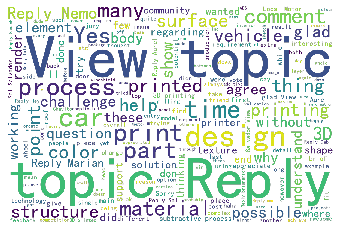

In [101]:
text_1 = ""
for i in df1["cut"]:
    text_1 += " ".join(i)
    text_1 += " "

cloudobj = wordcloud.WordCloud(font_path = font_path, 
    width = 1200, height = 800,
    mode = "RGBA", background_color = None,
    stopwords = stoplist_wc).generate(text_1)  

plt.imshow(cloudobj)
plt.axis("off")
plt.show()

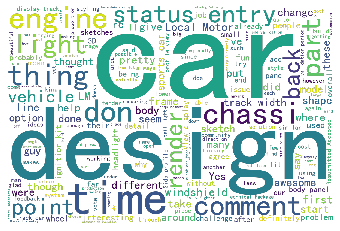

In [102]:
text_2 = ""
for i in df2["cut"]:
    text_2 += " ".join(i)
    text_2 += " "

cloudobj = wordcloud.WordCloud(font_path = font_path, 
    width = 1200, height = 800,
    mode = "RGBA", background_color = None,
    stopwords = stoplist_wc).generate(text_2)  

plt.imshow(cloudobj)
plt.axis("off")
plt.show()

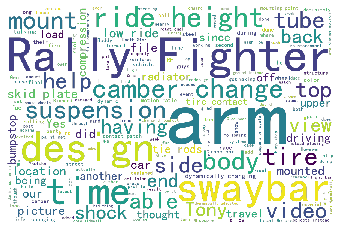

In [103]:
text_3 = ""
for i in df3["cut"]:
    text_3 += " ".join(i)
    text_3 += " "

cloudobj = wordcloud.WordCloud(font_path = font_path, 
    width = 1200, height = 800,
    mode = "RGBA", background_color = None,
    stopwords = stoplist_wc).generate(text_3)  

plt.imshow(cloudobj)
plt.axis("off")
plt.show()